<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:gray;'>
    <br/>
    PROJET 6<br/>
    <br/>
    "Effectuez une prédiction de revenus"
    <br/>
    <br/>
    Partie 1: Préparation des données<br/>
</h1>

## [Misson 1](#m1)  
* [Analyse des données brutes](#analyse)  
* [Correction des données](#correction)  
* [Ajout de la population](#pop)  

## [Misson 2](#m2)  
* [Diversité des distributions de revenus](#div)  
* [Représentation des indices de Gini](#gini)  
* [Evolution des indices de Gini](#evol)  
* [Calcul de l'indice de Gini à partir du fichier de la World Income Distribution](#calcul)  
* [Classement par indice de Gini](#classement)  

## [Mission 3](#m3)  
* [Ajout du coefficient d'élasticité](#ajout)  
* [Protocole du calcul de distribution condition conditionnelles](#proto)  
* [Application du protocole sur nos données](#appli)  

In [1]:
#! coding:utf-8
import pandas as pd
print(pd.__version__)

0.24.2


In [2]:
import numpy as np
print(np.__version__)

1.15.4


In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

print(matplotlib.__version__)

2.2.2


In [4]:
import scipy
import scipy.stats as st

print(scipy.__version__)

1.1.0


In [5]:
import seaborn as sns

print(sns.__version__)

0.9.0


In [6]:
from collections import Counter
import random

In [7]:
from functions1 import *

In [8]:
import os
os.makedirs('graph', exist_ok=True)

<a id='m1'></a>
## Misson 1

<a id='analyse'></a>
<h3 style='color:#8677b2'>Analyse des données brutes</h3>

[Haut de page](#sommaire)

In [9]:
# Chargement du fichier de la World Income Distribution
wid_brut = pd.read_csv("downloaded_files/data-projet7.csv", decimal=',')
wid_brut.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [10]:
wid_brut.tail()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11594,COD,2008,96,100,810.6233,303.19305
11595,COD,2008,97,100,911.7834,303.19305
11596,COD,2008,98,100,1057.8074,303.19305
11597,COD,2008,99,100,1286.6029,303.19305
11598,COD,2008,100,100,2243.1226,303.19305


In [11]:
# Taille du DataFrame wid_brut
wid_brut.shape

(11599, 6)

In [12]:
# Description du fichier brut
wid_brut.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


In [13]:
# Comptage des valeurs manquantes
wid_brut.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [14]:
# Description par année
wid_brut.groupby(by=['year_survey']).nunique()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,,
2004,1,1,100,1,100,1
2006,5,1,100,1,500,5
2007,15,1,100,1,1500,15
2008,76,1,100,1,7598,75
2009,12,1,100,1,1200,11
2010,6,1,100,1,600,6
2011,1,1,100,1,100,1


In [15]:
# Chargement du fichier de correspondance Code ISO et nom du pays en anglais
code_pays = pd.read_csv("downloaded_files/country_code.csv")
code_pays = code_pays[['Pays', 'ISO3']]
code_pays.head(3)

,Pays,ISO3
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB


<p style='color:#88cc8d;text-align:center'>
    Le fichier de correspondance "code pays/pays" provient de trucsweb.com:<br/>
    <a href="http://www.trucsweb.com/tutoriels/internet/iso_3166/">Source</a><br/> 
</p>

In [16]:
# Jointure de wid et de code_pays
wid = pd.merge(wid_brut, code_pays, how='left', left_on='country', right_on='ISO3')

wid.head(3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB


In [17]:
# Taille du DataFrame wid
wid.shape

(11599, 8)

In [18]:
# Vérification de valeurs nulles
wid.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
Pays            100
ISO3            100
dtype: int64

In [19]:
# Agrégation par 'country' avec 'nunique()'
frt = wid.groupby(by='country').nunique()
frt.head(3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,
ALB,1,1,100,1,100,1,1,1
ARG,1,1,100,1,100,1,1,1
ARM,1,1,100,1,100,1,1,1


In [20]:
# Vérification des gdpppp non renseignés
frt.loc[frt['gdpppp'] < 1]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,
PSE,1,1,100,1,100,0,1,1
XKX,1,1,100,1,100,0,0,0


In [21]:
# Vérification de la quantité du nombre de quantiles
frt.loc[frt['quantile'] < 100]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,
LTU,1,1,99,1,99,1,1,1


In [22]:
# Vérification du nombre de quantile  par ligne
frt.loc[frt['nb_quantiles'] > 1]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,


In [23]:
# Vérification du nombre d'année renseignée par pays
frt.loc[frt['year_survey'] > 1]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,


In [24]:
# Vérification des valeurs manquantes dans la correspondance entre entre pays et code pays ISO
frt.loc[frt['Pays'] < 1]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
country,,,,,,,,
XKX,1,1,100,1,100,0,0,0


<a id='correction'></a>
<h3 style='color:#8677b2'>Correction des données</h3>

[Haut de page](#sommaire)

In [25]:
# Affectation du code ISO3-3166 Alpha-3, du nom du pays et du GDP PPP
wid.loc[wid['country'] == 'XKX', 'ISO3'] = 'XKX'
wid.loc[wid['country'] == 'XKX', 'Pays'] = 'Kosovo'
wid.loc[wid['country'] == 'XKX', 'gdpppp'] = 7530.632

wid.loc[wid['country'] == 'XKX'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
5800,XKX,2008,1,100,437.8937,7530.632,Kosovo,XKX


<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues de la Banque Mondiale<br/>
    <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=XK">Source</a><br/> 
</p>

In [26]:
# Affectation du GDP PPP
wid.loc[wid['country'] == 'PSE', 'gdpppp'] = 3612.14

wid.loc[wid['country'] == 'PSE'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
11199,PSE,2009,1,100,195.2899,3612.14,Palestinian Territory Occupied,PSE


<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues du site theglobaleconomy.com<br/>
    <a href="https://www.theglobaleconomy.com/Palestine/GDP_per_capita_PPP/">Source</a><br/> 
</p>

In [27]:
# Affichage du GDP PPP maxi
wid.groupby('country').mean().sort_values('gdpppp').tail(3)

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
NOR,2008.0,50.5,100.0,22483.375020,49070.0
LUX,2008.0,50.5,100.0,25217.562681,73127.0
FJI,2008.0,50.5,100.0,2098.730882,4300332.0


In [28]:
# Affectation d'une valeur de GDP PPP plus cohérente
wid.loc[wid['country'] == 'FJI', 'gdpppp'] = 7384.086
wid.loc[wid['country'] == 'FJI'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
3200,FJI,2008,1,100,308.17334,7384.086,Fiji,FJI


<p style='color:#88cc8d;text-align:center'>
    Les données manquantes sont remplacées par des valeurs issues de la Banque Mondiale<br/>
    <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=FJ">Source</a><br/> 
</p>

In [29]:
# Recherche du quantile manquant dans les 25 premières lignes
wid.loc[wid['country'] == 'LTU'] [ : 25]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,LTU
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,LTU
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,LTU
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,LTU
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,LTU
6205,LTU,2008,6,100,1925.8641,17571.0,Lithuania,LTU
6206,LTU,2008,7,100,2048.3857,17571.0,Lithuania,LTU
6207,LTU,2008,8,100,2173.7112,17571.0,Lithuania,LTU
6208,LTU,2008,9,100,2302.0857,17571.0,Lithuania,LTU
6209,LTU,2008,10,100,2361.6480,17571.0,Lithuania,LTU


In [30]:
# Recherche du quantile manquant dans les 25 lignes suivantes
wid.loc[wid['country'] == 'LTU'] [25 : 50]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
6225,LTU,2008,26,100,3930.2112,17571.0,Lithuania,LTU
6226,LTU,2008,27,100,3990.3855,17571.0,Lithuania,LTU
6227,LTU,2008,28,100,4048.9220,17571.0,Lithuania,LTU
6228,LTU,2008,29,100,4109.7764,17571.0,Lithuania,LTU
6229,LTU,2008,30,100,4190.6610,17571.0,Lithuania,LTU
6230,LTU,2008,31,100,4254.9070,17571.0,Lithuania,LTU
6231,LTU,2008,32,100,4317.0664,17571.0,Lithuania,LTU
6232,LTU,2008,33,100,4360.1040,17571.0,Lithuania,LTU
6233,LTU,2008,34,100,4425.0396,17571.0,Lithuania,LTU
6234,LTU,2008,35,100,4503.2373,17571.0,Lithuania,LTU


In [31]:
# Calcul du quantile manquant par la moyenne des quantiles autour
inc_lit_qq = wid.loc[(wid['Pays'] == 'Lithuania') & (wid['quantile'] == 42) |
        (wid['Pays'] == 'Lithuania') & (wid['quantile'] == 40),'income'].mean()
inc_lit_qq

4882.14065

In [32]:
# Création de la ligne manquante (valeur moyenne entre q40 et q42)
lit_inc = pd.DataFrame({'country' :  ['LTU'],
                        'year_survey' : [2008],
                        'quantile' : [41],
                        'nb_quantiles' : [100],
                        'income' : [inc_lit_qq],
                        'gdpppp'  :  [17571.0],
                        'Pays' : ['Lithuania'],
                        'ISO3' :  ['LTU']})
lit_inc

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Pays,ISO3
0,LTU,2008,41,100,4882.14065,17571.0,Lithuania,LTU


In [33]:
# Concaténation avec wid
wid1 = pd.concat([wid, lit_inc], ignore_index=True, sort=True)
wid1.shape

(11600, 8)

In [34]:
# Vérification
wid1.tail(2)

,ISO3,Pays,country,gdpppp,income,nb_quantiles,quantile,year_survey
11598,COD,Congo Democratic Republic of the,COD,303.19305,2243.12260,100,100,2008
11599,LTU,Lithuania,LTU,17571.00000,4882.14065,100,41,2008


In [35]:
# Tri en place
wid1.sort_values(by=['country', 'quantile', 'year_survey'], inplace=True)

In [36]:
wid1.tail(2)

,ISO3,Pays,country,gdpppp,income,nb_quantiles,quantile,year_survey
11497,ZAF,South Africa,ZAF,9602.0,46297.316,100,99,2008
11498,ZAF,South Africa,ZAF,9602.0,82408.550,100,100,2008


In [37]:
wid1.shape

(11600, 8)

In [38]:
# Vérification des valeurs nulles
wid1.isnull().sum()

ISO3            0
Pays            0
country         0
gdpppp          0
income          0
nb_quantiles    0
quantile        0
year_survey     0
dtype: int64

In [39]:
# Pour la suite de l'etude nous nous placerons en 2008
# Nous prendnons comme approximation des valeurs de 2008, les valeurs des autres années
wid2 = wid1.drop(columns='year_survey')
wid2.head(3)

,ISO3,Pays,country,gdpppp,income,nb_quantiles,quantile
0,ALB,Albania,ALB,7297.0,728.89795,100,1
1,ALB,Albania,ALB,7297.0,916.66235,100,2
2,ALB,Albania,ALB,7297.0,1010.91600,100,3


In [40]:
wid2.shape

(11600, 7)

<a id='pop'></a>
<h3 style='color:#8677b2'>Ajout de la population</h3>

[Haut de page](#sommaire)

In [41]:
# Chargement du fichier des populations
pop = pd.read_csv('downloaded_files/population.csv', skiprows=4)

# Restriction sur les colonnes utiles
pop = pop[['Country Code', '2008']]

# Filtre des pays par le code ISO3
pop_monde = pd.merge(code_pays, pop, how='left', left_on='ISO3', right_on='Country Code')
pop.head(3)

,Country Code,2008
0,ABW,101353.0
1,AFG,27294031.0
2,AGO,21759420.0


<p style='color:#88cc8d;text-align:center'>
    Le fichier des tailles de populations provient de la banque mondiale:<br/>
    <a href="https://donnees.banquemondiale.org/indicateur/sp.pop.totl">Source</a><br/> 
</p>

In [42]:
# Jointure de wid2 et de pop_monde
wid_fin1 = pd.merge(wid2, pop_monde, how='left', on=['Pays', 'ISO3'])
wid_fin1.head(3)

,ISO3,Pays,country,gdpppp,income,nb_quantiles,quantile,Country Code,2008
0,ALB,Albania,ALB,7297.0,728.89795,100,1,ALB,2947314.0
1,ALB,Albania,ALB,7297.0,916.66235,100,2,ALB,2947314.0
2,ALB,Albania,ALB,7297.0,1010.91600,100,3,ALB,2947314.0


In [43]:
# Restriction des colonnes utiles
wid_fin1 = wid_fin1[['Pays', 'quantile', 'income', 'gdpppp', 'ISO3', '2008']]

# Modification du nom de la colonne contenant les populations
wid_fin1.rename(columns = {'2008' : 'Population'}, inplace = True)

wid_fin1.head(3)

,Pays,quantile,income,gdpppp,ISO3,Population
0,Albania,1,728.89795,7297.0,ALB,2947314.0
1,Albania,2,916.66235,7297.0,ALB,2947314.0
2,Albania,3,1010.91600,7297.0,ALB,2947314.0


In [44]:
# Vérification des valeurs manquantes
wid_fin1.isnull().sum()

Pays            0
quantile        0
income          0
gdpppp          0
ISO3            0
Population    200
dtype: int64

In [45]:
# Identification des pays incomplets
frt3 = wid_fin1.groupby(by='Pays').nunique()
frt3.loc[frt3['Population'] == 0]

,Pays,quantile,income,gdpppp,ISO3,Population
Pays,,,,,,
Kosovo,1,100,100,1,1,0
Taiwan Republic of China,1,100,100,1,1,0


In [46]:
wid_fin1.shape

(11600, 6)

In [47]:
# Affectation manuelle des valeurs manquantes
wid_fin1.loc[wid_fin1['Pays'] == 'Kosovo', 'Population'] = 1_747_400
wid_fin1.loc[wid_fin1['Pays'] == 'Taiwan Republic of China', 'Population'] = 23_037_000

<p style='color:#88cc8d;text-align:center'>
    Les données manquantes pour le Kosovo sont remplacées par des valeurs issues de la banque mondiale<br/>
    <a href="https://www.google.fr/publicdata/explore?ds=d5bncppjof8f9_&met_y=sp_pop_totl&hl=fr&dl=fr#!ctype=l&strail=false&bcs=d&nselm=h&met_y=sp_pop_totl&scale_y=lin&ind_y=false&rdim=region&idim=country:XKX&ifdim=region&hl=fr&dl=fr&ind=false">Source</a><br/> 
</p>
<p style='color:#88cc8d;text-align:center'>
    Les données manquantes pour Taiwan sont remplacées par des valeurs issues du site countryeconomy.com<br/>
    <a href="https://countryeconomy.com/demography/population/taiwan?year=2008">Source</a><br/> 
</p>

In [48]:
wid_fin1.isnull().sum()

Pays          0
quantile      0
income        0
gdpppp        0
ISO3          0
Population    0
dtype: int64

In [49]:
wid_fin1.shape

(11600, 6)

In [50]:
# Calcul de la population couverte par l'étude
inter = wid_fin1.groupby(by='Pays').mean()
pop_couv = inter['Population'].sum()

pop_couv

6210658108.0

In [51]:
# Calcul de la population mondiale 
inter1 = pop_monde['2008'].sum()

inter1

6741214175.0

In [52]:
# Pourcentage de la population couverte par l'étude
pourcentage_etude = 100 * pop_couv / inter1

pourcentage_etude

92.12966606271637

<a id='m2'></a>
## Misson 2

<a id='div'></a>
<h3 style='color:#8677b2'>Diversité des distributions de revenus</h3>

[Haut de page](#sommaire)

In [53]:
# Description des données par pays
wid_fin2 = wid_fin1.groupby(by='Pays').mean()
wid_fin2.reset_index(inplace=True)
wid_fin2.sort_values('income').tail()

,Pays,quantile,income,gdpppp,Population
81,Norway,50.5,22483.375020,49070.0,4768212.0
16,Canada,50.5,23739.640518,35895.0,33245773.0
63,Luxembourg,50.5,25217.562681,73127.0,488650.0
111,United States of America,50.5,25503.581661,43261.0,304093966.0
44,Iceland,50.5,26888.511518,36527.0,317414.0


In [54]:
wid_fin2.sort_values('income').head()

,Pays,quantile,income,gdpppp,Population
21,Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0
65,Madagascar,50.5,345.237074,950.00000,19996469.0
23,Cote d'Ivoire,50.5,399.835204,1526.00000,19497986.0
55,Kenya,50.5,519.320032,1429.00000,39148416.0
99,Swaziland,50.5,530.283828,4748.00000,1158897.0


In [55]:
wid_fin2.describe()

,quantile,income,gdpppp,Population
count,116.0,116.000000,116.000000,1.160000e+02
mean,50.5,6069.121925,12440.466006,5.354016e+07
std,0.0,6660.966925,13151.884845,1.682490e+08
min,50.5,276.016044,303.193050,3.174140e+05
25%,50.5,1374.270126,2577.500000,4.698545e+06
50%,50.5,3287.174692,7517.816000,1.407229e+07
75%,50.5,7077.900152,17679.250000,3.945691e+07
max,50.5,26888.511518,73127.000000,1.324655e+09


In [56]:
# Pays avec les revenus moyens les plus faibles
wid_fin2[wid_fin2['income'] < 277]

,Pays,quantile,income,gdpppp,Population
21,Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0


In [57]:
# Pays avec les revenus moyens premier quartile
wid_fin2[(wid_fin2['income'] > 1370) & (wid_fin2['income'] < 1378)]

,Pays,quantile,income,gdpppp,Population
114,Viet Nam,50.5,1377.773966,2578.0,86707801.0


In [58]:
# Pays avec les revenus moyens médians
wid_fin2[(wid_fin2['income'] > 3277) & (wid_fin2['income'] < 3296)]

,Pays,quantile,income,gdpppp,Population
85,Paraguay,50.5,3278.080965,4347.0,6047117.0


In [59]:
# Pays avec les revenus moyens troisième quartile
wid_fin2[(wid_fin2['income'] > 7051) & (wid_fin2['income'] < 7105)]

,Pays,quantile,income,gdpppp,Population
18,Chile,50.5,7051.609966,13390.0,16661942.0


In [60]:
# Pays avec les revenus moyens les plus forts
wid_fin2[wid_fin2['income'] > 26888]

,Pays,quantile,income,gdpppp,Population
44,Iceland,50.5,26888.511518,36527.0,317414.0


In [61]:
# La france
wid_fin2.loc[wid_fin2['Pays'] == 'France']

,Pays,quantile,income,gdpppp,Population
35,France,50.5,18309.407545,30357.0,64374989.0


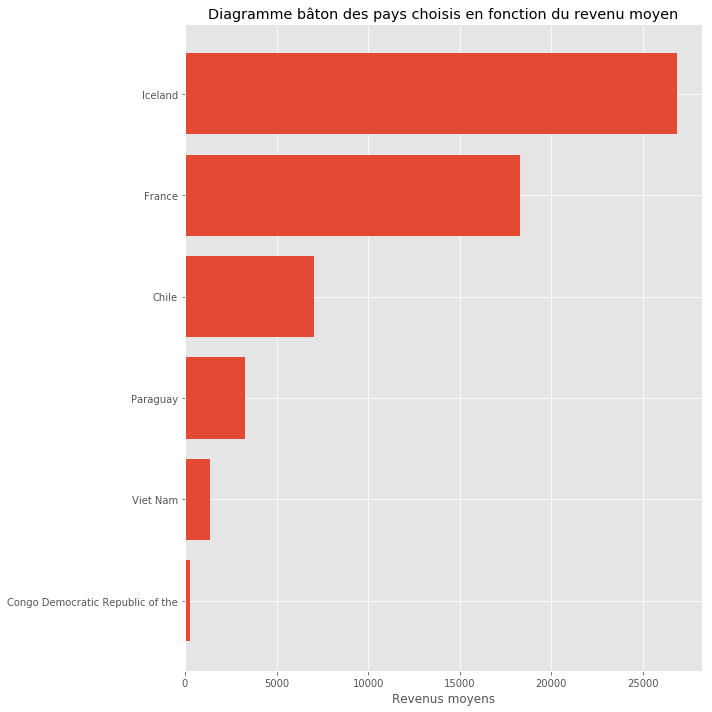

In [62]:
incm_inter = wid_fin2[(wid_fin2['Pays'] == 'France') |
                     (wid_fin2['Pays'] == 'Congo Democratic Republic of the') |
                     (wid_fin2['Pays'] == 'Viet Nam') |
                     (wid_fin2['Pays'] == 'Paraguay') |
                     (wid_fin2['Pays'] == 'Chile') |
                     (wid_fin2['Pays'] == 'Iceland')].sort_values('income')

# Paramètres généraux
plt.figure(figsize=(10,10))

# Paramètres graphiques
plt.barh(incm_inter.Pays, incm_inter.income)

# Métadonnées
plt.title('Diagramme bâton des pays choisis en fonction du revenu moyen')
plt.xlabel('Revenus moyens')
plt.tight_layout() # Permet de ne pas couper les labels

# Sauvegarde
plt.savefig('graph/diag_bat_incm.png')
plt.show()

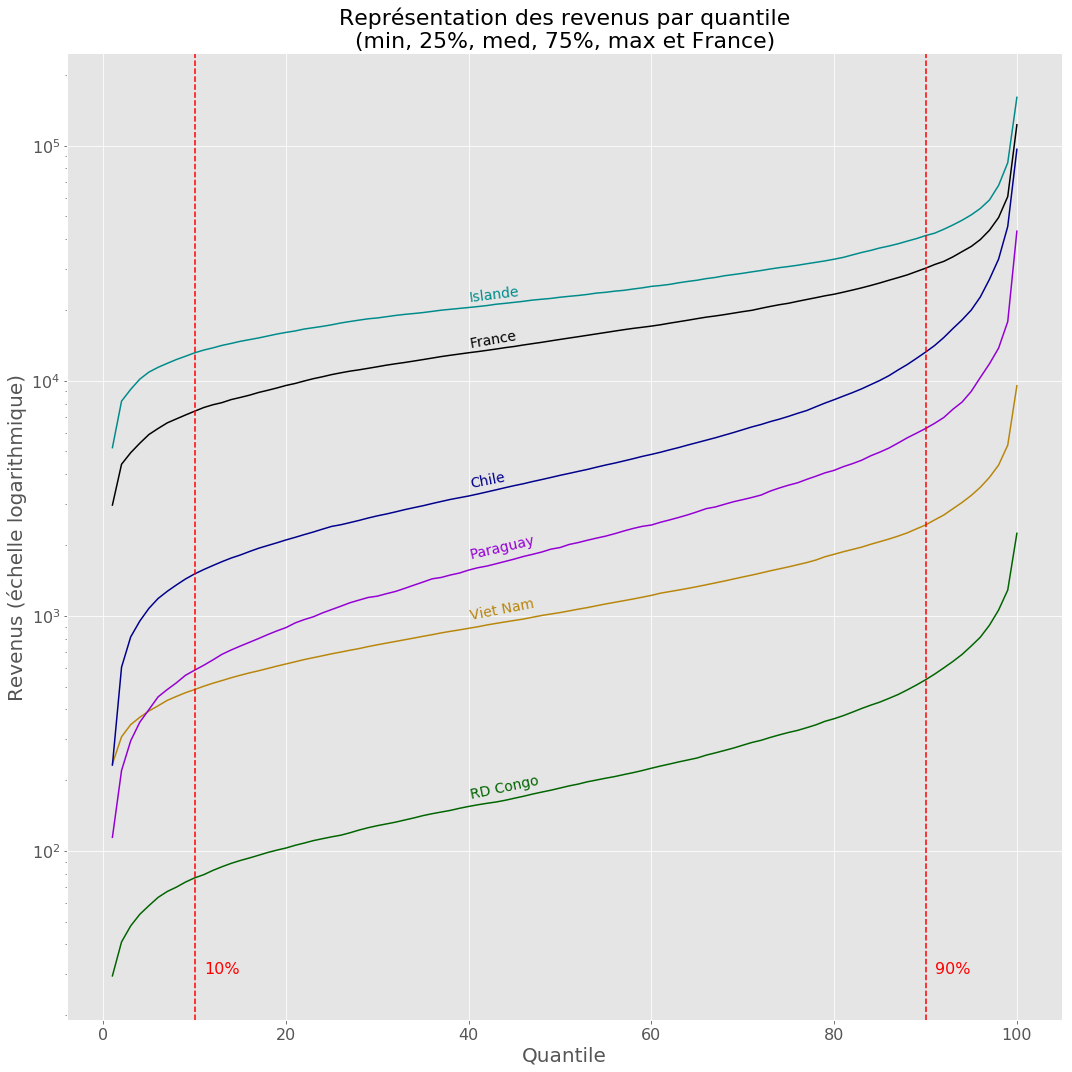

In [63]:
# Préparation des données par pays choisis
incm_fra = wid_fin1[wid_fin1['Pays'] == 'France']
incm_con = wid_fin1[wid_fin1['Pays'] == 'Congo Democratic Republic of the']
incm_vie = wid_fin1[wid_fin1['Pays'] == 'Viet Nam']
incm_par = wid_fin1[wid_fin1['Pays'] == 'Paraguay']
incm_chi = wid_fin1[wid_fin1['Pays'] == 'Chile']
incm_ice = wid_fin1[wid_fin1['Pays'] == 'Iceland']

# Création des labels
label = ['France',  'RD Congo (min)', 'Viet Nam (25%)', 'Paraguay (med)', 'Chile (75%)', 'Islande (max)']

# Paramètres généraux
plt.figure(figsize=(15,15))
plt.yscale('log')

# Paramètres des courbes
plt.plot(incm_fra['quantile'], incm_fra['income'], color='black')
plt.text(40, 15000 , 'France', fontsize = '14', color='black', rotation = 10)

plt.plot(incm_con['quantile'], incm_con['income'], color='darkgreen')
plt.text(40, 192 , 'RD Congo', fontsize = '14', color='darkgreen', rotation = 12)

plt.plot(incm_vie['quantile'], incm_vie['income'], color='darkgoldenrod')
plt.text(40, 1090 , 'Viet Nam', fontsize = '14', color='darkgoldenrod', rotation = 11)

plt.plot(incm_par['quantile'], incm_par['income'], color='darkviolet')
plt.text(40, 2030 , 'Paraguay', fontsize = '14', color='darkviolet', rotation = 13)

plt.plot(incm_chi['quantile'], incm_chi['income'], color='darkblue')
plt.text(40, 3750 , 'Chile', fontsize = '14', color='darkblue', rotation = 11)

plt.plot(incm_ice['quantile'], incm_ice['income'], color='darkcyan')
plt.text(40, 23100 , 'Islande', fontsize = '14', color='darkcyan', rotation = 7)

# Paramètre des lignes de référence
plt.axvline(10, linestyle='--', color='r')
plt.text(11, 30, '10%', color='r', fontsize=16)
plt.axvline(90, linestyle='--', color='r')
plt.text(91, 30, '90%', color='r', fontsize=16)

# Métadonnées
plt.title('Représentation des revenus par quantile\n(min, 25%, med, 75%, max et France)', fontsize=22)
plt.ylabel('Revenus (échelle logarithmique)', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('Quantile', fontsize=20)
plt.xticks(fontsize=16)
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/representation_revenus.png')
plt.show()

<a id='gini'></a>
<h3 style='color:#8677b2'>Représentation des indices de Gini</h3>

[Haut de page](#sommaire)

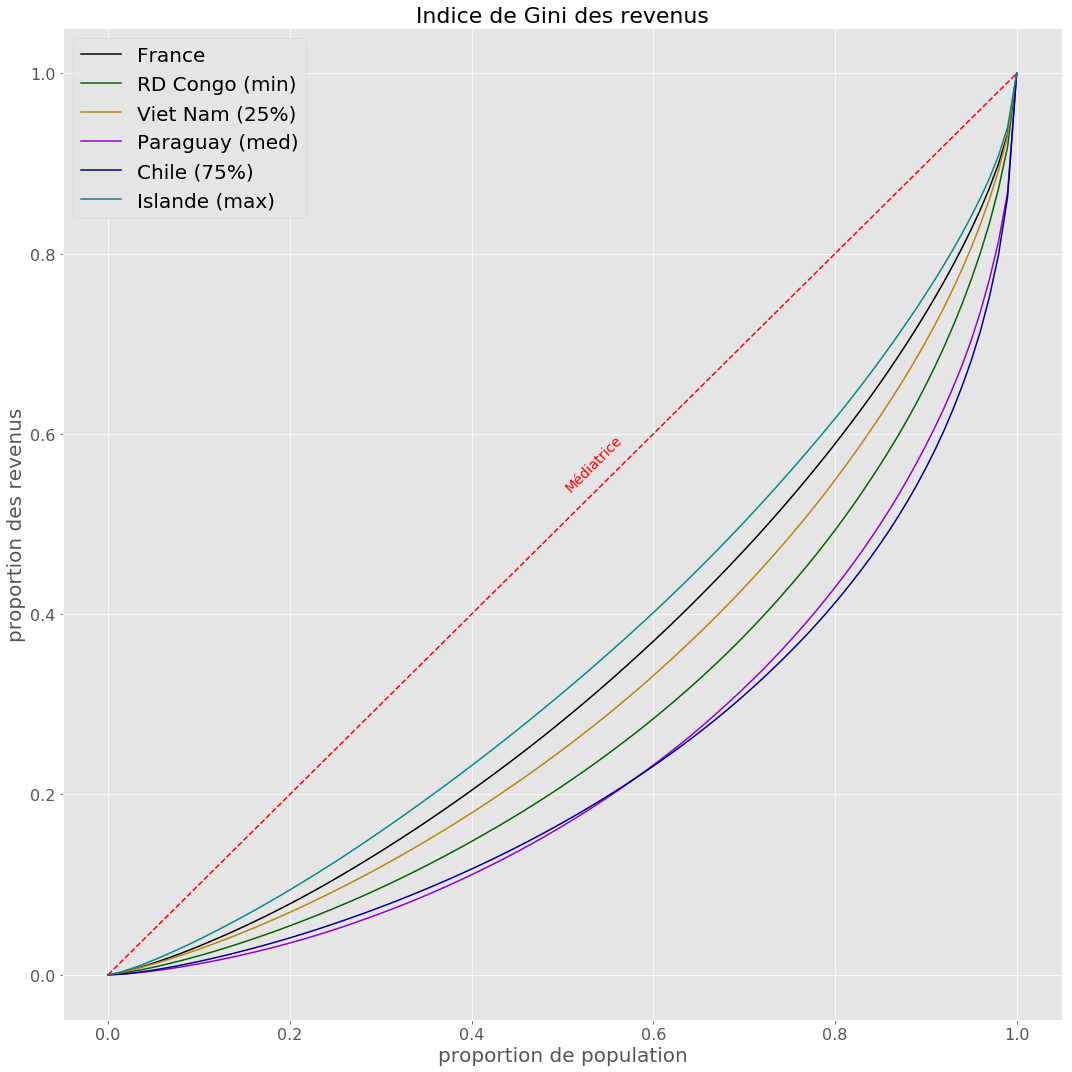

In [64]:
# Calculs des données des courbes de Lorenz
income_fra = incm_fra['income'].values
lorenz_fra = np.cumsum(np.sort(income_fra)) / income_fra.sum()
lorenz_fra = np.append([0], lorenz_fra)

income_con = incm_con['income'].values
lorenz_con = np.cumsum(np.sort(income_con)) / income_con.sum()
lorenz_con = np.append([0], lorenz_con)

income_vie = incm_vie['income'].values
lorenz_vie = np.cumsum(np.sort(income_vie)) / income_vie.sum()
lorenz_vie = np.append([0], lorenz_vie)

income_par = incm_par['income'].values
lorenz_par = np.cumsum(np.sort(income_par)) / income_par.sum()
lorenz_par = np.append([0], lorenz_par)

income_chi = incm_chi['income'].values
lorenz_chi = np.cumsum(np.sort(income_chi)) / income_chi.sum()
lorenz_chi = np.append([0], lorenz_chi)

income_ice = incm_ice['income'].values
lorenz_ice = np.cumsum(np.sort(income_ice)) / income_ice.sum()
lorenz_ice = np.append([0], lorenz_ice)

# Paramètres généraux
plt.figure(figsize=(15,15))

# Paramètres des courbes de Lorenz
plt.plot(np.linspace(0,1,len(lorenz_fra)),lorenz_fra, color='black')
plt.plot(np.linspace(0,1,len(lorenz_con)),lorenz_con, color='darkgreen')
plt.plot(np.linspace(0,1,len(lorenz_vie)),lorenz_vie, color='darkgoldenrod')
plt.plot(np.linspace(0,1,len(lorenz_par)),lorenz_par, color='darkviolet')
plt.plot(np.linspace(0,1,len(lorenz_chi)),lorenz_chi, color='darkblue')
plt.plot(np.linspace(0,1,len(lorenz_ice)),lorenz_ice, color='darkcyan')

# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Médiatrice')
plt.text(0.5, 0.59, 'Médiatrice', fontsize=14, rotation = 45, color ='red')

# Métadonnées
plt.title('Indice de Gini des revenus', fontsize=22)
plt.ylabel('proportion des revenus', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('proportion de population', fontsize=20)
plt.xticks(fontsize=16)
plt.legend(label, prop={'size':20})
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/gini_revenus.png')
plt.show()

<a id='evol'></a>
<h3 style='color:#8677b2'>Evolution des indices de Gini</h3>

[Haut de page](#sommaire)

In [65]:
# Chargement du fichier
gini_brut = pd.read_csv('downloaded_files/gini.csv', skiprows=3, skipinitialspace=True, index_col=1)

# Mise en forme des données
gini_brut.reset_index(inplace=True)
gini_brut.rename(columns={'Country Name': 'Country'}, inplace =True)
gini_brut.drop(columns=['Country Code',
                      'Indicator Name',
                      'Indicator Code',
                       'Unnamed: 63'], inplace = True)
gini_brut.set_index('Country', inplace=True)
gini_brut = gini_brut.transform(lambda x: x / 100)

gini_brut.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318,0.333,0.278,0.29,0.263,0.273,0.265,0.267,0.29,NaN
"Yémen, Rép. du",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.367,NaN,NaN,NaN,NaN
Afrique du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.634,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN
Zambie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.556,NaN,NaN,NaN,NaN,0.571,NaN,NaN,NaN
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.432,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style='color:#88cc8d;text-align:center'>
    Les données ont été téléchargées sur le site de la banque mondiale<br/>
    <a href="https://donnees.banquemondiale.org/indicateur/si.pov.gini?view=map">Source</a><br/>
    data > Dimension: Inequality > Inequality: Income inequality, Gini coefficient<br/>
</p>

In [66]:
# Recherche de pays
liste_pays = gini_brut.index
for i in liste_pays:
    if 'congo' in i.lower():
        print(i)
    if 'chil' in i.lower():
        print(i)
    if 'land' in i.lower():
        print(i)

Chili
Congo, République démocratique du
Congo, République du
Finlande
Groenland
Irlande
Islande
Nouvelle-Zélande
Thaïlande


In [67]:
# Données disponibles pour la France
gini_fra = gini_brut.loc[gini_brut.index == 'France'].iloc[0:].dropna(axis=1)
gini_fra

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,
France,0.314,0.306,0.298,0.297,0.324,0.33,0.327,0.337,0.333,0.331,0.325,0.323,0.327


In [68]:
# Données disponibles pour la République démocratique du Congo
gini_con = gini_brut.loc[gini_brut.index == 'Congo, République démocratique du'].iloc[0:].dropna(axis=1)
gini_con

,2004,2012
Country,,
"Congo, République démocratique du",0.422,0.421


In [69]:
# Données disponibles pour le Viet Nam
gini_vie = gini_brut.loc[gini_brut.index == 'Viet Nam'].iloc[0:].dropna(axis=1)
gini_vie

,1992,1998,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,
Viet Nam,0.357,0.354,0.37,0.368,0.358,0.356,0.393,0.356,0.348,0.353


In [70]:
# Données disponibles pour le Paraguay
gini_par = gini_brut.loc[gini_brut.index == 'Paraguay'].iloc[0:].dropna(axis=1)
gini_par

,1990,1995,1997,1999,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Paraguay,0.408,0.582,0.549,0.546,0.546,0.573,0.549,0.523,0.514,0.53,...,0.507,0.491,0.51,0.523,0.476,0.479,0.507,0.476,0.479,0.488


In [71]:
# Données disponibles pour le Chili
gini_chi = gini_brut.loc[gini_brut.index == 'Chili'].iloc[0:].dropna(axis=1)
gini_chi

,1987,1990,1992,1994,1996,1998,2000,2003,2006,2009,2011,2013,2015,2017
Country,,,,,,,,,,,,,,
Chili,0.562,0.572,0.548,0.564,0.549,0.555,0.528,0.515,0.482,0.49,0.476,0.473,0.477,0.466


In [72]:
# Données disponibles pour l'Islande
gini_ice = gini_brut.loc[gini_brut.index == 'Islande'].iloc[0:].dropna(axis=1)
gini_ice

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,
Islande,0.268,0.28,0.29,0.302,0.295,0.318,0.287,0.262,0.268,0.268,0.254,0.278


In [73]:
# Restriction des données sur les pays concernés
gini = gini_brut.loc[(gini_brut.index == 'France') |
                    (gini_brut.index == 'Congo, République démocratique du') |
                    (gini_brut.index == 'Viet Nam') |
                    (gini_brut.index == 'Paraguay') |
                     (gini_brut.index == 'Chili' )|
                    (gini_brut.index =='Islande')].T

# Nommage de l'index
gini.index.name = 'year'

gini.tail()

Country,Chili,"Congo, République démocratique du",France,Islande,Paraguay,Viet Nam
year,,,,,,
2014,NaN,NaN,0.323,0.278,0.507,0.348
2015,0.477,NaN,0.327,NaN,0.476,NaN
2016,NaN,NaN,NaN,NaN,0.479,0.353
2017,0.466,NaN,NaN,NaN,0.488,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN


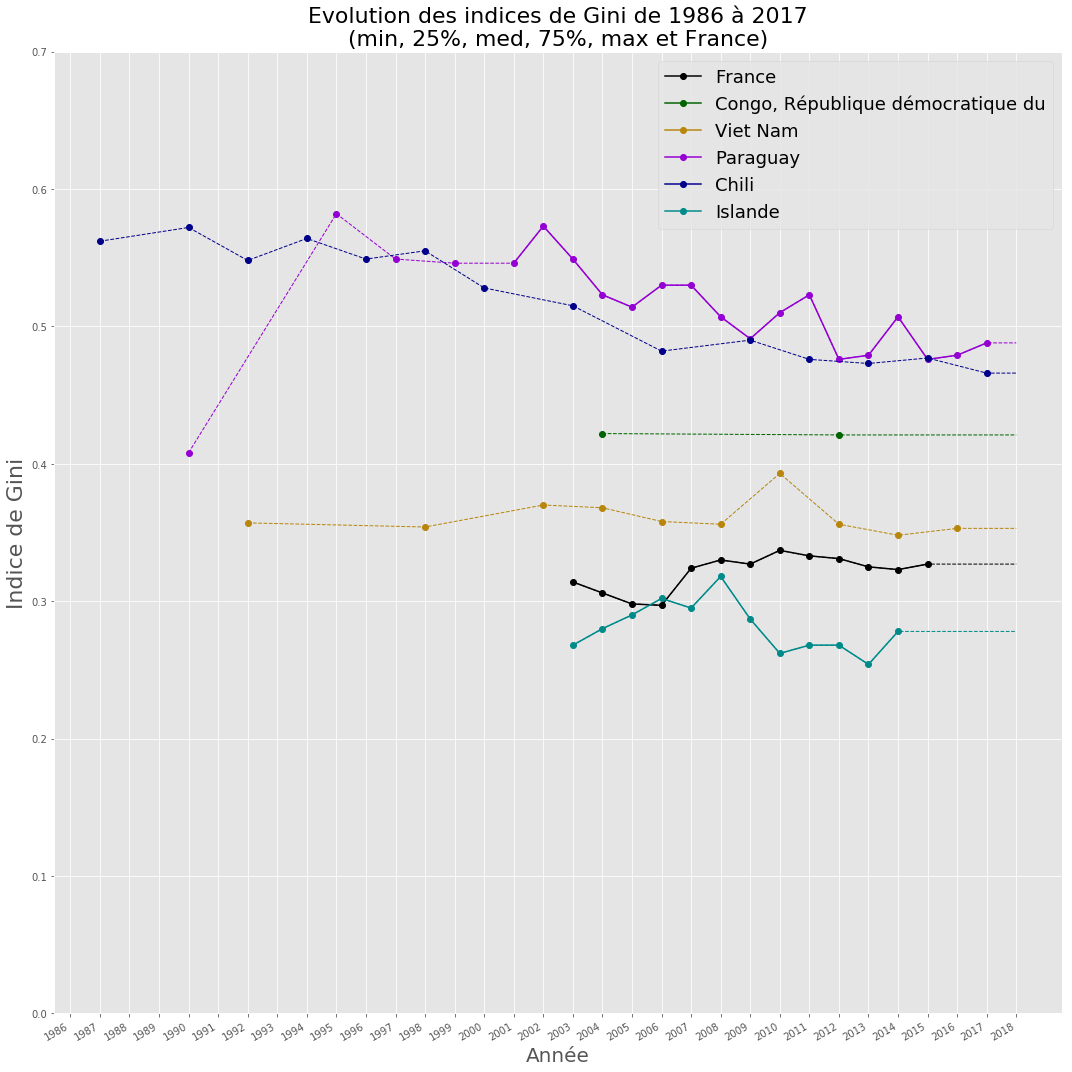

In [74]:
# Paramètre généraux
fig, ax = plt.subplots(figsize=(15,15))

# Paramètres des courbes
line, = ax.plot(gini['France'].interpolate(method='linear'),
                ls = '--', lw = 1, color='Black', label='')
ax.plot(gini['France'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Congo, République démocratique du'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgreen', label='')
ax.plot(gini['Congo, République démocratique du'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Viet Nam'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkgoldenrod', label='')
ax.plot(gini['Viet Nam'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Paraguay'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkviolet', label='')
ax.plot(gini['Paraguay'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Chili'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkblue', label='')
ax.plot(gini['Chili'], color=line.get_color(), lw=1.5, marker = 'o')

line, = ax.plot(gini['Islande'].interpolate(method='linear'),
                ls = '--', lw = 1, color='darkcyan', label='')
ax.plot(gini['Islande'], color=line.get_color(), lw=1.5, marker = 'o')


# Métadonnées
plt.title('Evolution des indices de Gini de 1986 à 2017\n(min, 25%, med, 75%, max et France)', fontsize=22)
plt.xlabel('Année', fontsize=20)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('Indice de Gini', fontsize = 22)
plt.ylim(0,0.7)
plt.legend(fontsize=18)
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/evolution_gini.png')
plt.show()

<a id='calcul'></a>
<h3 style='color:#8677b2'>Calcul de l'indice de Gini à partir du fichier de la World Income Distribution</h3>

[Haut de page](#sommaire)

In [75]:
# Liste des pays
key = wid_fin1['Pays'].drop_duplicates().values

# Création colonne vide
wid_fin1['Gini'] = 0

# Calcul de l'indice de Gini pour chaque pays et remplissage de la colonne Gini
for i in key:
    income1 = wid_fin1.loc[wid_fin1['Pays'] == i].income.values
    lorenz = np.cumsum(np.sort(income1)) / income1.sum()
    lorenz = np.append([0], lorenz)
    wid_fin1.loc[wid_fin1['Pays'] == i, 'Gini'] = 2 * (0.5 - (lorenz[:-1].sum() / len(lorenz)))

wid_fin1.head()

,Pays,quantile,income,gdpppp,ISO3,Population,Gini
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141
3,Albania,4,1086.90780,7297.0,ALB,2947314.0,0.32141
4,Albania,5,1132.69970,7297.0,ALB,2947314.0,0.32141


In [76]:
# Sélection des pays suivis
comp_gini = wid_fin1.loc[(wid_fin1['Pays'] == 'France') |
             (wid_fin1['Pays'] == 'Congo Democratic Republic of the') |
             (wid_fin1['Pays'] == 'Viet Nam') |
             (wid_fin1['Pays'] == 'Paraguay') |
             (wid_fin1['Pays'] == 'Chile') |
             (wid_fin1['Pays'] == 'Iceland')].groupby('Pays').mean()

comp_gini

,quantile,income,gdpppp,Population,Gini
Pays,,,,,
Chile,50.5,7051.609966,13390.00000,16661942.0,0.546115
Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0,0.459403
France,50.5,18309.407545,30357.00000,64374989.0,0.345640
Iceland,50.5,26888.511518,36527.00000,317414.0,0.302046
Paraguay,50.5,3278.080965,4347.00000,6047117.0,0.539729
Viet Nam,50.5,1377.773966,2578.00000,86707801.0,0.393546


In [77]:
# Ajout des coefficients téléchargés sur le site de la banque mondiale
comp_gini['gini2'] = gini_brut[(gini_brut.index == 'France') |
          (gini_brut.index == 'Congo, République démocratique du') |
         (gini_brut.index == 'Viet Nam') |
         (gini_brut.index == 'Paraguay') |
         (gini_brut.index == 'Chili') |
         (gini_brut.index == 'Islande')]['2008'].values

# La valeur de 2009 est choisie pour le Chili
comp_gini.loc[comp_gini.index == 'Chile', 'gini2'] = gini_brut[gini_brut.index == 'Chili']['2009'].values

comp_gini['Différence de Gini'] = comp_gini['Gini'] - comp_gini['gini2']
comp_gini

,quantile,income,gdpppp,Population,Gini,gini2,Différence de Gini
Pays,,,,,,,
Chile,50.5,7051.609966,13390.00000,16661942.0,0.546115,0.490,0.056115
Congo Democratic Republic of the,50.5,276.016044,303.19305,60373608.0,0.459403,NaN,NaN
France,50.5,18309.407545,30357.00000,64374989.0,0.345640,0.330,0.015640
Iceland,50.5,26888.511518,36527.00000,317414.0,0.302046,0.318,-0.015954
Paraguay,50.5,3278.080965,4347.00000,6047117.0,0.539729,0.507,0.032729
Viet Nam,50.5,1377.773966,2578.00000,86707801.0,0.393546,0.356,0.037546


<a id='classement'></a>
<h3 style='color:#8677b2'>Classement par indice de Gini</h3>

[Haut de page](#sommaire)

In [78]:
# Classement selon l'indice de Gini
wid_fin3 = wid_fin1.groupby(by='Pays').mean()
rank_gini = wid_fin3.sort_values(by='Gini', ascending=False)
rank_gini.reset_index(inplace=True)

# Les 5 pays avec le plus haut indice de Gini
max_five_gini = rank_gini.head()

max_five_gini

,Pays,quantile,income,gdpppp,Population,Gini
0,South Africa,50.5,5617.904880,9602.0,50412129.0,0.682949
1,Honduras,50.5,3296.268419,3628.0,7872658.0,0.615512
2,Colombia,50.5,3547.005276,8185.0,44901544.0,0.583437
3,Guatemala,50.5,2142.474753,4367.0,14006366.0,0.582468
4,Central African Republic,50.5,811.299901,685.0,4345386.0,0.575972


In [79]:
# Moyenne de l'indice de Gini des 5 plus forts indices
max_five_gini['Gini'].mean()

0.6080675959510912

In [80]:
# Les 5 pays avec le plus faible indice de Gini
min_five_gini = rank_gini.tail()

min_five_gini

,Pays,quantile,income,gdpppp,Population,Gini
111,Ukraine,50.5,3349.388306,6721.0,46258200.0,0.272415
112,Sweden,50.5,16184.222707,34371.0,9219637.0,0.272166
113,Czech Republic,50.5,8235.293411,23223.0,10384603.0,0.270162
114,Slovakia,50.5,6096.579894,20515.0,5379233.0,0.264573
115,Slovenia,50.5,12106.007475,27197.0,2021316.0,0.248249


In [81]:
# Moyenne de l'indice de Gini des 5 plus faible indices
min_five_gini['Gini'].mean()

0.26551310572405

In [82]:
# Position de la France (77 ème)
rank_gini.loc[rank_gini['Pays'] == 'France']

,Pays,quantile,income,gdpppp,Population,Gini
76,France,50.5,18309.407545,30357.0,64374989.0,0.34564


<a id='m3'></a>
## Misson 3

<a id='ajout'></a>
<h3 style='color:#8677b2'>Ajout du coefficient d'élasticité</h3>

[Haut de page](#sommaire)

In [83]:
# Chargement du fichier de la banque mondiale
gdim = pd.read_csv('downloaded_files/gdim.csv')

# Projection sur les colonnes utiles
gdima = gdim[['countryname', 'iso3', 'region', 'incgroup4', 'year', 'IGEincome']]

# Copie du dataframe initial
gdimb = gdima.copy()

# Création d'une colonne regroupant l'appelation 'region' et 'incgroup4'
gdimb['Group'] = gdimb[['region', 'incgroup4']].apply(lambda x: ', '.join(x), axis=1)

gdimb.head()

,countryname,iso3,region,incgroup4,year,IGEincome,Group
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,"South Asia, Low income"


In [84]:
# Calcul des 'IGEincome'  moyen par région et groupe de revenus
frt6 = gdimb.groupby(['region', 'incgroup4', 'Group']).mean()[['IGEincome']]
frt6.reset_index(inplace=True)
frt6.set_index('Group', inplace=True)

frt6

,region,incgroup4,IGEincome
Group,,,
"East Asia & Pacific, Lower middle income",East Asia & Pacific,Lower middle income,0.527665
"East Asia & Pacific, Upper middle income",East Asia & Pacific,Upper middle income,0.469500
"Europe & Central Asia, Lower middle income",Europe & Central Asia,Lower middle income,0.424817
"Europe & Central Asia, Upper middle income",Europe & Central Asia,Upper middle income,0.477171
"High income, High income",High income,High income,0.348050
"Latin America & Caribbean, Lower middle income",Latin America & Caribbean,Lower middle income,0.940737
"Latin America & Caribbean, Upper middle income",Latin America & Caribbean,Upper middle income,0.878852
"Middle East & North Africa, Lower middle income",Middle East & North Africa,Lower middle income,0.916461
"Middle East & North Africa, Upper middle income",Middle East & North Africa,Upper middle income,0.517398


In [85]:
# Affectation de la valeur moyenne du fichier elasticity.txt pour la zone 'Asie'  - 'Base case'
gdimb.loc[(gdimb['region'] == 'South Asia') &
          (gdimb['incgroup4'] == 'Upper middle income'), 'IGEincome'] = 0.5

In [86]:
# Vérification des années existantes pour l'IGEincome
frt4 = gdimb.groupby(by='year').nunique()
frt4

,countryname,iso3,region,incgroup4,year,IGEincome,Group
year,,,,,,,
1940,107,107,7,4,1,0,14
1950,110,110,7,4,1,0,14
1960,114,114,7,4,1,38,14
1970,111,111,7,4,1,36,14
1980,147,147,7,4,1,2,15


In [87]:
# Création d'un dataframe avec les 'IGEincome' en colonnes
gdimc = pd.pivot_table(gdimb, values='IGEincome', index={'countryname'}, columns='year', dropna=False)
gdimc.reset_index(inplace=True)
gdimc.set_index('countryname', inplace=True)

gdimc.head(3)

year,1940,1950,1960,1970,1980
countryname,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,0.815874,NaN
Angola,NaN,NaN,NaN,NaN,NaN


In [88]:
# Jointure et mise en forme du dataframe  
gdimd = pd.merge(gdimb, gdimc, on='countryname')
gdimd.drop(columns=['year', 'IGEincome'], inplace=True)
gdimd.set_index('countryname', inplace=True)

gdimd.head(3)

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
countryname,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",NaN,NaN,NaN,NaN,NaN


In [89]:
# Vérification des valeurs nulles
gdimd.isnull().sum()

iso3            0
region          0
incgroup4       0
Group           0
1940         6504
1950         6504
1960         4420
1970         4442
1980         6432
dtype: int64

In [90]:
# Vérification de l'existence d'un seul coefficient d'elasticité par pays
frt2 = gdimd.groupby(by='countryname').nunique()
frt2['test_annee'] = frt2[1940] + frt2[1950] + frt2[1960] + frt2[1970] + frt2[1980]
frt2.loc[frt2['test_annee'] > 1]

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980,test_annee
countryname,,,,,,,,,,


In [91]:
# Nombre de pays sans coefficient d'élasticité
len(frt2.loc[frt2['test_annee'] == 0])

74

In [92]:
# Aggrégation par pays selon la moyenne
gdime = gdimd.groupby(by=['countryname', 'iso3', 'region', 'incgroup4', 'Group']).mean()
gdime.reset_index(inplace=True)
gdime.set_index('countryname', inplace = True)

# Remplacement des 'NaN' par une string 'rien'
gdime.fillna('rien', inplace=True)

gdime.head(3)

,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
countryname,,,,,,,,,
Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",rien,rien,rien,rien,rien
Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",rien,rien,rien,0.815874,rien
Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",rien,rien,rien,rien,rien


In [93]:
# Création d'une clef pour itérer
key1 = gdime.index
key1

Index(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela, RB', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.',
       'Zambia'],
      dtype='object', name='countryname', length=150)

In [94]:
for i in key1:
    if gdime.loc[i, 1980] != 'rien':
        gdime.loc[i, [1940, 1950, 1960, 1970]] = gdime.loc[i, 1980] # Si il existe une valeur en 1980
                                                                    #elle est propagée
    elif gdime.loc[i, 1970] != 'rien':
        gdime.loc[i, [1940, 1950, 1960, 1980]] = gdime.loc[i, 1970] # Sinon, si il existe une valeur en 1970
                                                                    # Elle est propagée
    
    elif gdime.loc[i, 1960] != 'rien':
        gdime.loc[i, [1940, 1950, 1970, 1980]] = gdime.loc[i, 1960] # Sinon, si il existe une valeur en 1960
                                                                    #elle est propagée
    
    elif ((gdime.loc[i, 1980] == 'rien') and
              (gdime.loc[i, 1970] == 'rien') and
              (gdime.loc[i, 1960] == 'rien') and
              (gdime.loc[i, 1950] == 'rien') and
              (gdime.loc[i, 1940] == 'rien')): # Si il n'y a aucune valeur
                                               # On choisi la valeur moyenne de la région
                                               #du niveau de revenu
            k = gdime.loc[i, 'Group']
            gdime.loc[i, [1940, 1950, 1950, 1960, 1970, 1980]] = frt6.loc[k, 'IGEincome']

In [95]:
gdime.isnull().sum()

iso3         0
region       0
incgroup4    0
Group        0
1940         0
1950         0
1960         0
1970         0
1980         0
dtype: int64

In [96]:
# Assignation du type float pour les colonnes contenant les IGEincome
gdime[[1940, 1950, 1960, 1970, 1980]] = gdime[[1940, 1950, 1960, 1970, 1980]].astype(float)

gdime.dtypes

iso3          object
region        object
incgroup4     object
Group         object
1940         float64
1950         float64
1960         float64
1970         float64
1980         float64
dtype: object

In [97]:
gdime.reset_index(inplace=True)
gdime.head(3)

,countryname,iso3,region,incgroup4,Group,1940,1950,1960,1970,1980
0,Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",0.436000,0.436000,0.436000,0.436000,0.436000
1,Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874,0.815874,0.815874,0.815874,0.815874
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",0.677000,0.677000,0.677000,0.677000,0.677000


In [98]:
# Mise en forme du dataframe
gdimf = gdime.drop(columns=[1940,1950,1960,1970]).rename(columns={'countryname': 'pays',
                                                                  'iso3': 'ISO3',
                                                                  1980: 'Coef Elas'})
gdimf.reset_index(inplace=True, drop=True)

gdimf.head(3)

,pays,ISO3,region,incgroup4,Group,Coef Elas
0,Afghanistan,AFG,South Asia,Low income,"South Asia, Low income",0.436000
1,Albania,ALB,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"Sub-Saharan Africa, Upper middle income",0.677000


In [99]:
# Vérification des valeurs moyennes par région et niveau de revenus
gdimf.groupby(by='Group').mean()

,Coef Elas
Group,
"East Asia & Pacific, Lower middle income",0.527665
"East Asia & Pacific, Upper middle income",0.469500
"Europe & Central Asia, Lower middle income",0.424817
"Europe & Central Asia, Upper middle income",0.477171
"High income, High income",0.346502
"Latin America & Caribbean, Lower middle income",0.940737
"Latin America & Caribbean, Upper middle income",0.878852
"Middle East & North Africa, Lower middle income",0.916461
"Middle East & North Africa, Upper middle income",0.517398


In [100]:
# Recherche des codes pays communs aux deux fichiers
pays_gdim = gdimf.ISO3.unique()
pays = wid_fin1.ISO3.unique()
ctrl = np.intersect1d(pays, pays_gdim)

len(ctrl)

114

In [101]:
# Jointure de wid_fin1 et gdime
ready_db = pd.merge(wid_fin1, gdimf, how='left', on='ISO3' )

# Suppression des colonnes inutiles
ready_db.drop(columns=['pays'], inplace=True)

ready_db.head()

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
3,Albania,4,1086.90780,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
4,Albania,5,1132.69970,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874


In [102]:
# Recherche des valleurs nulles ou manquantes
ready_db.isnull().sum()

Pays            0
quantile        0
income          0
gdpppp          0
ISO3            0
Population      0
Gini            0
region        200
incgroup4     200
Group         200
Coef Elas     200
dtype: int64

In [103]:
# Affichage des lignes incomplètes
ready_db.loc[ready_db['region'].isnull()].groupby(by=['Pays', 'ISO3']).nunique()

,,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
Pays,ISO3,,,,,,,,,,,
Kosovo,XKX,1,100,100,1,1,1,1,0,0,0,0
Syrian Arab Republic (Syria),SYR,1,100,100,1,1,1,1,0,0,0,0


<p style='color:#88cc8d;text-align:center'>
    Les données proviennent de la version anglaise du site de la FAO<br/>
    <a href="http://www.fao.org/faostat/fr/#data">Source</a><br/>
English > Population > Annual population > REGIONS > Africa > (list)<br/>
</p>

In [104]:
# Recherche de ces pays dans gdim
for i in pays_gdim:
    if 'k' in i.lower():
        print(i)
    elif 'sy' in i.lower():
        print(i)
    elif 'sr' in i.lower():
        print(i)

KHM
DNK
ISR
KAZ
KEN
KIR
KOR
KSV
KGZ
MKD
PAK
SRB
SVK
LKA
TJK
UKR


In [105]:
# Affichage des valeurs retrouvées manuellement
gdimf.loc[gdimf['ISO3'] == 'KSV']

,pays,ISO3,region,incgroup4,Group,Coef Elas
71,Kosovo,KSV,Europe & Central Asia,Lower middle income,"Europe & Central Asia, Lower middle income",0.424817


In [106]:
# Saisie manuelle
ready_db.loc[ready_db['Pays'] == 'Kosovo', ['region', 'incgroup4', 'Group', 'Coef Elas']] =\
['Europe & Central Asia', 'Lower middle income', 'Europe & Central Asia, Lower middle income', 0.424817]

ready_db.loc[ready_db['Pays'] == 'Kosovo'].head(1)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
11300,Kosovo,1,437.8937,7530.632,XKX,1747400.0,0.331163,Europe & Central Asia,Lower middle income,"Europe & Central Asia, Lower middle income",0.424817


In [107]:
#Affichage des informations sur la Syrie
ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)'].groupby(['Pays']).mean()

,quantile,income,gdpppp,Population,Gini,Coef Elas
Pays,,,,,,
Syrian Arab Republic (Syria),50.5,685.817495,4512.0,20325443.0,0.373873,NaN


In [108]:
# Restriction sur les pays du même Group
inter = ready_db.loc[ready_db['Group'] == 'Middle East & North Africa, Lower middle income'].groupby('Pays').mean()
inter.reset_index(inplace=True)

# Restriction sur les pays de la même région
inter

,Pays,quantile,income,gdpppp,Population,Gini,Coef Elas
0,Egypt,50.5,1969.577399,5011.00,80953881.0,0.347097,0.943205
1,Morocco,50.5,2337.600601,3973.00,31596855.0,0.422964,0.945745
2,Palestinian Territory Occupied,50.5,1114.098514,3612.14,3596688.0,0.371354,0.916461
3,Yemen,50.5,1042.635870,2224.00,22356391.0,0.390259,0.916461


In [109]:
# Calcul du Coef. d'Elas moyen des pays similaires
coef_elas_moy_syr = inter['Coef Elas'].mean()

In [110]:
# Affectation manuelle
ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)',
             ['region',
              'incgroup4',
              'Group',
              'Coef Elas']] = ['Middle East & North Africa',
                               'Upper middle income',
                               'Middle East & North Africa, Upper middle income',
                               coef_elas_moy_syr]

ready_db.loc[ready_db['Pays'] == 'Syrian Arab Republic (Syria)'].head(3)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
10000,Syrian Arab Republic (Syria),1,143.18066,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468
10001,Syrian Arab Republic (Syria),2,179.06183,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468
10002,Syrian Arab Republic (Syria),3,195.83022,4512.0,SYR,20325443.0,0.373873,Middle East & North Africa,Upper middle income,"Middle East & North Africa, Upper middle income",0.930468


In [111]:
# Vérification des valeurs nulles
ready_db.isnull().sum()

Pays          0
quantile      0
income        0
gdpppp        0
ISO3          0
Population    0
Gini          0
region        0
incgroup4     0
Group         0
Coef Elas     0
dtype: int64

In [112]:
ready_db.head(3)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
1,Albania,2,916.66235,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
2,Albania,3,1010.91600,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874


In [113]:
ready_db.shape

(11600, 11)

<a id='proto'></a>
<h3 style='color:#8677b2'>Protocole du calcul de distribution condition conditionnelles</h3>

[Haut de page](#sommaire)

In [114]:
#  Définition des paramètres
nb_quantiles = 10
n = 1000 * nb_quantiles
pj = 0.9

# Génération selon la loi Normale
ln_y_parent = st.norm(0,1).rvs(size=n)
residus = st.norm(0,1).rvs(size=n)

# Calcul des revenus des parents et des enfants
y_child = np.exp(pj * ln_y_parent + residus)
y_parents = np.exp(ln_y_parent)

# Conversion des tableaux en series
y_child = pd.Series(y_child)
y_parents = pd.Series(y_parents)

# Détermination de la classe de revenus des enfants
size_child = len(y_child)
l_sorted_child = y_child.copy()
l_sorted_child = l_sorted_child.sort_values()
quantiles_child = np.round(np.arange(1,
                                     nb_quantiles + 1,
                                     nb_quantiles / size_child) - 0.5 + 1./size_child)
q_dict_child = {a: int(b) for a, b in zip(l_sorted_child, quantiles_child)}
c_i_child = pd.Series(q_dict_child[e] for e in  y_child)

# Détermination de la classe de revenus des enfants
size_parents = len(y_parents)
l_sorted_parents = y_parents.copy()
l_sorted_parents = l_sorted_parents.sort_values()
quantiles_parents = np.round(np.arange(1,
                                       nb_quantiles + 1,
                                       nb_quantiles / size_parents) - 0.5 + 1./size_parents)
q_dict_parents = {a: int(b) for a, b in zip(l_sorted_parents, quantiles_parents)}
c_i_parent = pd.Series(q_dict_parents[e] for e in  y_parents)

# Mise en forme
sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis = 1)
sample.columns = ['y_child', 'y_parents', 'c_i_child', 'c_i_parent']

In [115]:
sample.head()

,y_child,y_parents,c_i_child,c_i_parent
0,0.083373,0.197080,1,1
1,2.385278,1.079734,8,6
2,1.965344,2.025623,7,8
3,4.592264,2.717778,9,9
4,2.603061,1.482355,8,7


In [116]:
# On compte chaque combinaison c_i_child, c_i_parent
counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
counts = counts.reset_index()
counts.columns = ["c_i_child","c_i_parent","counts"]

counts.head(3)

,c_i_child,c_i_parent,counts
0,1,1,465
1,1,2,221
2,1,3,128


In [117]:
# On divise le nombre d'individus compté par le nombre d'individus total pour chaque quantile parent
# Ces opération existe sous forme d'une fonction distribution()
# Qui prend en arguments un dataframe et un le nombre de quantiles
distrib = []
total = counts["counts"].sum()

for q_p in range(1, nb_quantiles+1):
    subset = counts[counts.c_i_parent == q_p]
    if len(subset):
        nb = subset["counts"].values[0]
        distrib += [nb / total]
    else:
        distrib += [0]
print(len(distrib), total, distrib)

10 10000 [0.0465, 0.0221, 0.0128, 0.0078, 0.0046, 0.0028, 0.0018, 0.0012, 0.0004, 0.0002]


In [118]:
# Pour chaque quantile enfant, on crée la ligne de distribution du c_i_parent
# Ces opérations et les précedentes seront réalisées par la fonction conditional_distributions()
# Qui prend pour argument le dataframe avec les revenus et les quantiles enfant et parent
mat = []
for child_quantile in np.arange(nb_quantiles)+1:
    subset = counts[counts.c_i_child == child_quantile]
    mat += [distribution(subset, nb_quantiles)]
cd = np.array(mat)
cd

array([[0.465, 0.221, 0.128, 0.078, 0.046, 0.028, 0.018, 0.012, 0.004,
        0.   ],
       [0.204, 0.203, 0.176, 0.13 , 0.093, 0.092, 0.052, 0.03 , 0.018,
        0.002],
       [0.123, 0.165, 0.158, 0.142, 0.127, 0.097, 0.086, 0.06 , 0.037,
        0.005],
       [0.096, 0.111, 0.158, 0.153, 0.158, 0.123, 0.087, 0.05 , 0.045,
        0.019],
       [0.043, 0.119, 0.127, 0.129, 0.137, 0.124, 0.113, 0.103, 0.08 ,
        0.025],
       [0.028, 0.081, 0.089, 0.124, 0.119, 0.145, 0.135, 0.126, 0.11 ,
        0.043],
       [0.02 , 0.052, 0.085, 0.093, 0.122, 0.119, 0.146, 0.153, 0.128,
        0.082],
       [0.017, 0.027, 0.05 , 0.072, 0.097, 0.118, 0.159, 0.17 , 0.163,
        0.127],
       [0.003, 0.018, 0.022, 0.054, 0.067, 0.11 , 0.13 , 0.148, 0.218,
        0.23 ],
       [0.001, 0.003, 0.007, 0.025, 0.034, 0.044, 0.074, 0.148, 0.197,
        0.467]])

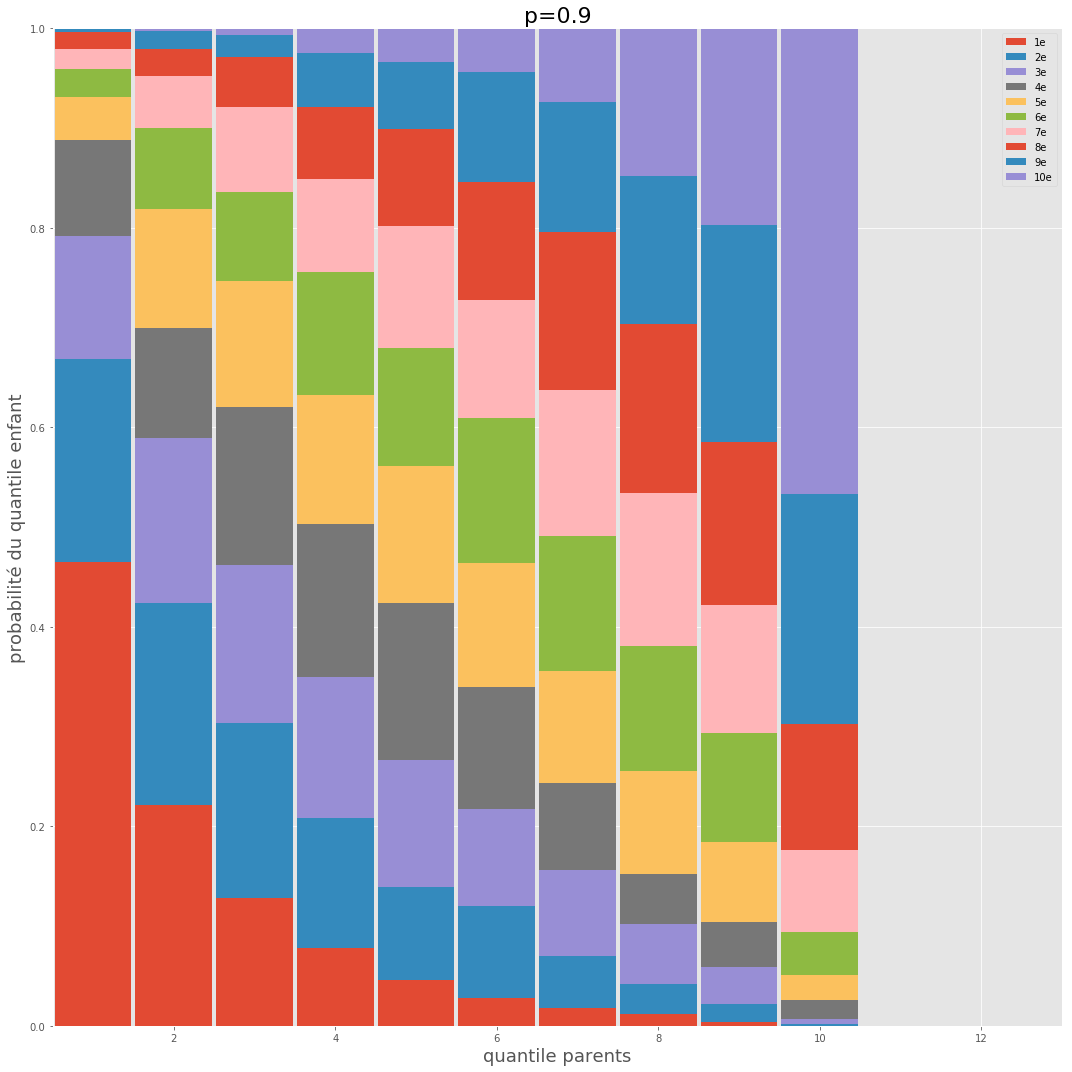

In [119]:
# Graphique pour une faible mobilité
plt.figure(figsize=(15,15))
cumul = np.array([0] * nb_quantiles)
for i, child_quantile in enumerate(cd):
    plt.bar(np.arange(nb_quantiles) + 1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) + 'e')
    cumul = cumul + np.array(child_quantile)
    
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title('p=' + str(pj), fontsize=22)
plt.legend()
plt.xlabel('quantile parents', fontsize=18)
plt.ylabel('probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

plt.savefig('graph/exemple_faible_mobi.png')
plt.show()

In [120]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 0 est:
c_i_child = 0
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.9) = 0.465


In [121]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child = 0
c_i_parent = 9
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.9) = 0.0


In [122]:
# Définition de nouveaux paramètres pour une forte mobilité
pj1 = 0.1
y_child1, y_parents1 = generate_incomes(n, pj1)
sample1 = compute_quantiles(y_child1, y_parents1, nb_quantiles)
cd1 = conditional_distributions(sample1, nb_quantiles)
cd1

array([[0.131, 0.115, 0.094, 0.103, 0.106, 0.113, 0.092, 0.071, 0.1  ,
        0.075],
       [0.125, 0.089, 0.104, 0.116, 0.098, 0.092, 0.099, 0.11 , 0.083,
        0.084],
       [0.091, 0.122, 0.112, 0.096, 0.106, 0.083, 0.105, 0.102, 0.104,
        0.079],
       [0.1  , 0.086, 0.128, 0.109, 0.081, 0.105, 0.101, 0.101, 0.099,
        0.09 ],
       [0.103, 0.111, 0.1  , 0.093, 0.092, 0.109, 0.116, 0.091, 0.081,
        0.104],
       [0.094, 0.107, 0.107, 0.086, 0.096, 0.097, 0.103, 0.106, 0.097,
        0.107],
       [0.088, 0.09 , 0.09 , 0.112, 0.113, 0.103, 0.081, 0.118, 0.111,
        0.094],
       [0.106, 0.088, 0.096, 0.092, 0.107, 0.1  , 0.099, 0.099, 0.106,
        0.107],
       [0.093, 0.098, 0.09 , 0.099, 0.093, 0.098, 0.097, 0.112, 0.095,
        0.125],
       [0.069, 0.094, 0.079, 0.094, 0.108, 0.1  , 0.107, 0.09 , 0.124,
        0.135]])

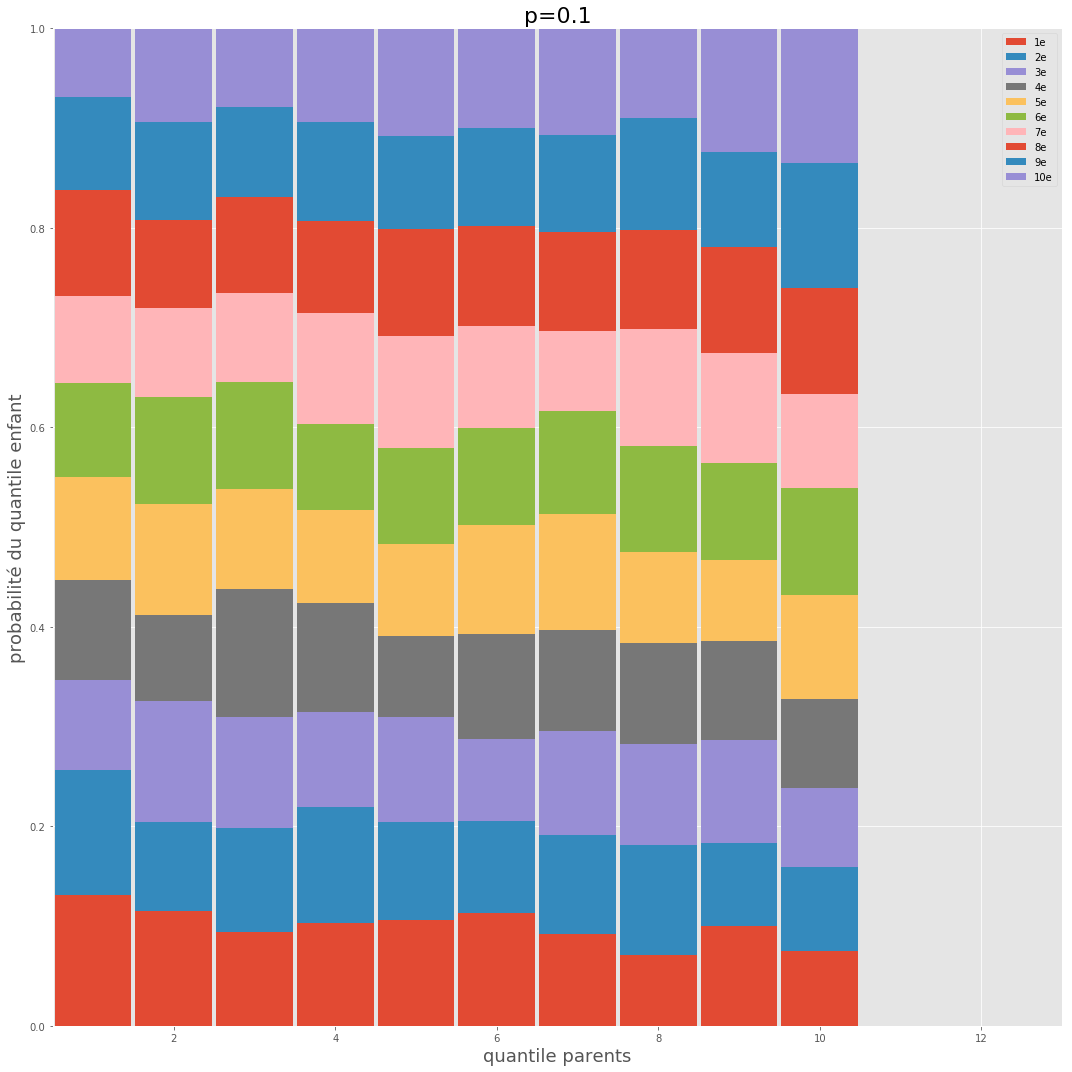

In [123]:
# Graphique pour une forte mobilité
plt.figure(figsize=(15,15))
cumul1 = np.array([0] * nb_quantiles)
for i, child_quantile in enumerate(cd1):
    plt.bar(np.arange(nb_quantiles) + 1, child_quantile, bottom=cumul1, width=0.95, label = str(i+1) + 'e')
    cumul1 = cumul1 + np.array(child_quantile)
    
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title('p=' + str(pj1), fontsize=22)
plt.legend()
plt.xlabel('quantile parents', fontsize=18)
plt.ylabel('probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

plt.savefig('graph/exemple_forte_mobi.png')
plt.show()

In [124]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.1 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 1 est:
c_i_child1 = 0
c_i_parent1 = 0
p1 = proba_cond(c_i_parent1, c_i_child1, cd1)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj1, p1))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.1) = 0.131


In [125]:
# Sachant que la classe de revenus d'un enfant est 1 et Coef Elas est 0.1 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child1 = 0
c_i_parent1 = 9
p1 = proba_cond(c_i_parent1, c_i_child1, cd1)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj1, p1))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.1) = 0.075


<a id='appli'></a>
<h3 style='color:#8677b2'>Application du protocole sur nos données</h3>

[Haut de page](#sommaire)

In [126]:
# Clonage des lignes 
ready_db1 = pd.concat([ready_db] * 500)
ready_db1.sort_values(by=['Pays', 'quantile'], inplace=True)

In [127]:
ready_db1.shape

(5800000, 11)

In [128]:
ready_db1.head(3)

,Pays,quantile,income,gdpppp,ISO3,Population,Gini,region,incgroup4,Group,Coef Elas
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874
0,Albania,1,728.89795,7297.0,ALB,2947314.0,0.32141,Europe & Central Asia,Upper middle income,"Europe & Central Asia, Upper middle income",0.815874


In [129]:
# Mise en forme 
ready_db1.rename(columns={'quantile': 'c_i_child', 'income': 'y_child', 'Gini': 'Gj', 'Coef Elas': 'pj'}, inplace=True)
ready_db1 = ready_db1[['Pays', 'c_i_child', 'y_child', 'Gj', 'pj']]

ready_db1.head(3)

,Pays,c_i_child,y_child,Gj,pj
0,Albania,1,728.89795,0.32141,0.815874
0,Albania,1,728.89795,0.32141,0.815874
0,Albania,1,728.89795,0.32141,0.815874


In [130]:
# Nombre de d'individus générés aléatoirement 1_000 * nb_quantiles
n=100_000

# Préparation des données
nb_quantiles=100
key3 = ready_db1['Pays'].drop_duplicates().values
c_i_parent = []
ready_db1['c_i_parent'] = 0

# Pour chaque pays
for pays in key3:
    # Selection du pays
    y_child, y_parent = generate_incomes(n, ready_db1.loc[ready_db1['Pays'] == pays, 'pj'].iloc[0]) 
    # Création des quantiles
    sample = compute_quantiles(y_child, y_parent, nb_quantiles) 
    # Création de l'arrondi du nombre d'individus attendu en fonction des distributions conditionnelles
    cd = np.round(conditional_distributions(sample, nb_quantiles) * 500)
    # Typage en entier
    cd = np.array(cd, int)
    # Passage en dataframe
    cdd = pd.DataFrame(cd)
    # Création de la transposée
    cdt = cdd.T
    # Pour chaque c_i_child
    for cic in np.arange(100):
        # Création d'une liste d'index des valeurs supérieur à 5 grâce à la transposée
        list_random = cdt.loc[cdt[cic] > 5, cic].index.tolist()

        # Si la somme des individus par pays et c_i_child est inférieure à 500 individus
        if cdd.loc[cdd.index == cic].sum().sum() < 500:        
            # Calcul du nombre de valeurs manquantes
            diff = 500 - cdd.loc[cdd.index == cic].sum().sum()
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Ajout de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] + 1

        # Si la somme des individus par pays et c_i_child est supérieure à 500 individus
        elif cdd.loc[cdd.index == cic].sum().sum() > 500:
            # Calcul du nombre de valeurs en trop
            diff = cdd.loc[cdd.index == cic].sum().sum() - 500
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Soustraction de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] - 1

        # Pour chaque c_i_parent
        for cip in range(0,100):
            # On étend la liste c_i_parent de l'index + 1 de la valeur contenu en c_i_child, c_i_parent
            c_i_parent.extend(np.repeat(cip + 1, cdd.iloc[cic, cip], axis=0))
    # On affecte les valeurs de la liste c_i_parent à la colonne c_i_parent de notre dataframe principale
    ready_db1.loc[(ready_db1['Pays'] == pays), 'c_i_parent'] = c_i_parent
    # On reinitialise la liste c_i_parent
    c_i_parent =[]

In [131]:
ready_db1.tail()

,Pays,c_i_child,y_child,Gj,pj,c_i_parent
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100
11499,Yemen,100,9050.4375,0.390259,0.916461,100


In [132]:
# Suppression de la variable c_i_child inutile pour la mission 4
ready_db1.drop(columns='c_i_child', inplace=True)

In [133]:
# Création d'un dataframe avec la variable revenu moyen du pays
y_child_moy_df = ready_db1.groupby(by='Pays').mean()
y_child_moy_df.reset_index(inplace=True)
y_child_moy_df = y_child_moy_df[['Pays', 'y_child']]
y_child_moy_df.rename(columns={'y_child': 'mj'}, inplace=True)

y_child_moy_df.head(3)

,Pays,mj
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785


In [134]:
# Ajout de la colonne y_child_moy
ready_db2 = pd.merge(ready_db1, y_child_moy_df, on='Pays')
ready_db2.head(3)

,Pays,y_child,Gj,pj,c_i_parent,mj
0,Albania,728.89795,0.32141,0.815874,1,2994.829902
1,Albania,728.89795,0.32141,0.815874,1,2994.829902
2,Albania,728.89795,0.32141,0.815874,1,2994.829902


In [135]:
# Ajout des colonnes 'logarithmes'
ready_db2['ln_y_child'] = np.log(ready_db2['y_child'])
ready_db2['ln_mj'] = np.log(ready_db2['mj'])

ready_db2.tail(3)

,Pays,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
5799997,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799998,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507
5799999,Yemen,9050.4375,0.390259,0.916461,100,1042.63587,9.110568,6.949507


In [138]:
ready_db2.groupby('Pays').count().shape

(116, 7)

In [137]:
# Enregistrement du fichier
ready_db2.to_csv('analyse.csv', index=False)

[Haut de page](#sommaire)